In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [2]:
def stock_sim(S0, T, r, sigma, dt, num_steps):
    stock_prices = np.zeros(num_steps + 1)
    stock_prices[0] = S0
    num_steps = int(T / dt)
    
    for i in range(1, num_steps + 1):
        dW = np.random.normal(0, 1)
        stock_prices[i] = stock_prices[i - 1] + stock_prices[i - 1] * (r * dt + sigma * np.sqrt(dt) * dW)

    return stock_prices

def average_payoff(S0, K, T, r, sigma, dt, num_simulations, num_steps):
    payoffs = np.zeros(num_simulations)

    for i in range(num_simulations):
        stock_prices = stock_sim(S0, T, r, sigma, dt, num_steps)
        payoff = np.maximum(K - stock_prices[-1], 0)
        payoffs[i] = payoff

    return np.mean(payoffs)

In [3]:
def run_simulation():
    S0 = 100
    K = 99
    T = 1
    r = 0.06
    sigma = 0.2
    dt = 1 / 365
    num_simulations = 100
    num_steps = int(T / dt)

    payoff = average_payoff(S0, K, T, r, sigma, dt, num_simulations, num_steps)
    option_price = np.exp(-r * T) * payoff
    return option_price

In [4]:
print(run_simulation())

4.861324165765079


In [5]:
def converge_payoff(S0, K, T, r, sigma, dt, num_simulations, num_steps):

    payoffs = []

    mean_payoffs = []
    i_s = []
    error = []
    for i in range(num_simulations):

        stock_prices = stock_sim(S0, T, r, sigma, dt, num_steps)
        payoff = np.maximum(K - stock_prices[-1], 0)
        payoffs.append(payoff)


        mean_payoffs.append(np.mean(payoffs))
        i_s.append(i+1)
        error.append(float(np.var(mean_payoffs)) / float(math.sqrt(i+1)))


    return mean_payoffs, i_s, error

In [6]:
def convergence(S0, K, T, r, sigma, dt, num_simulations):

    num_steps = int(T / dt)

    payoffs = converge_payoff(S0, K, T, r, sigma, dt, num_simulations, num_steps)
    option_price = np.asarray(payoffs[0])
    steps = np.asarray(payoffs[1])
    error = np.asarray(payoffs[2])

    plt.plot(steps, option_price)
    #plt.errorbar(steps, option_price, yerr = error, fmt = '.')
    plt.fill_between(steps, option_price-error, option_price+error,alpha=1, facecolor='r')
    plt.ylim(bottom=0)
    plt.show()


6.238169063300116


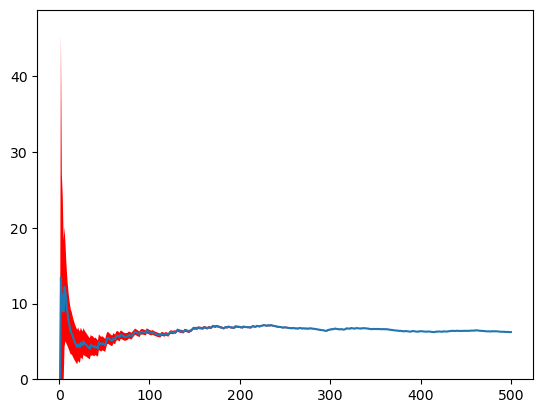

In [7]:
convergence(100, 99, 1, 0.06, 0.2, 1/365, 500)

In [8]:
def varying_K(S0, T, r, sigma, dt, num_simulations):

    num_steps = int(T / dt)

    for K in range(80, 110, 5):
        payoffs = converge_payoff(S0, K, T, r, sigma, dt, num_simulations, num_steps)
        option_price = np.asarray(payoffs[0])
        steps = np.asarray(payoffs[1])
        error = np.asarray(payoffs[2])

        plt.plot(steps, option_price, label = f'{K}')
        plt.fill_between(steps, option_price-error, option_price+error,alpha=0.5)
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

def varying_sigma(S0,K, T, r, dt, num_simulations):

    num_steps = int(T / dt)
        
    for sigma in np.arange(0.1, 0.6, 0.1):
        payoffs = converge_payoff(S0, K, T, r, sigma, dt, num_simulations, num_steps)
        option_price = np.asarray(payoffs[0])
        steps = np.asarray(payoffs[1])
        error = np.asarray(payoffs[2])

        plt.plot(steps, option_price, label = f'{sigma}')
        plt.fill_between(steps, option_price-error, option_price+error,alpha=0.5)
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

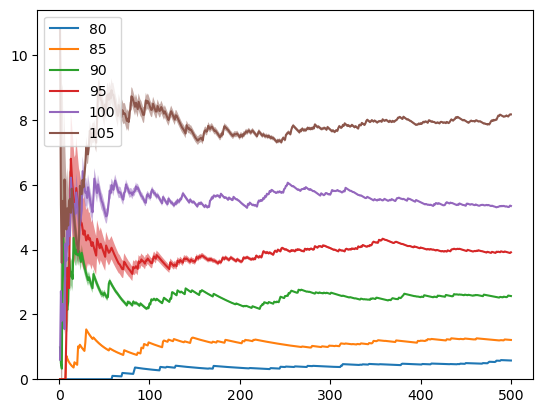

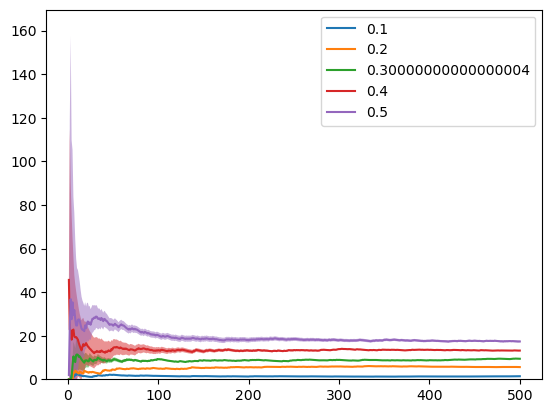

In [9]:
varying_K(100, 1, 0.06, 0.2, 1/365, 500)
varying_sigma(100,99, 1, 0.06, 1/365, 500)